<div align="center">

  # <span style="color:black;">**PERANCANGAN APLIKASI SAINS DATA**</span>
  #### <span style="color:black;">PREDIKSI SPESIES PENGUIN</span>

---

</div>

**Catatan analisis yang dibuat oleh:**

1. Himam Bashiran (NIM: 2311110055)
2. Leonardus Ananto Widodo (NIM: 2311110058)
3. Shafa Syahida (NIM: 2311110050)
4. Donna Nur Tamara (NIM: 2311110014)
5. Brian Nugraha Wiyono (NIM: 2311110052)

  # <b><font color='black'>Palmer Penguin Analysis</font></b>
---

- Task : Classification
- Objective : Prediksi Klasifikasi Spesies Penguin

   # <b><font color='black'>Importing All Necessary Libraries</font></b>
---

In [1]:
!pip install scikit-learn==1.5.0
!pip install imbalanced-learn==0.12.0

In [52]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Measurement Method
import math

# Exploratory Data Analysis
from tqdm.notebook import tqdm

# Preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
# from imblearn.over_sampling import SMOTE

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Warning Detection
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

   # <b><font color='black'>Data Collection</font></b>
---
Dataset Palmer Penguin dapat diakses dari website kaggle [Palmer Penguins Dataset](https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset/data)

In [4]:
# Kaggle
df = pd.read_csv("/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv", encoding='ISO-8859-1')

   # <b><font color='black'>Exploratory Data Analysis (EDA)</font></b>
---
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik dataset sebelum melakukan pemodelan atau pengambilan keputusan. 

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Observasi data
df.shape

(344, 7)

In [8]:
# Cek jumlah data duplikat
df.duplicated().sum()

0

In [9]:
# Jumlahkan semua nilai yang hilang dalam dataset dan simpan hanya kolom dengan nilai yang hilang > 0
missing = df.isna().sum()[df.isnull().sum() > 0]

# Buat dataframe yang termasuk jumlah NaN dan Persentase NaN dari dataset
missing_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(df)}).sort_values(by = 'NaN_percentage', ascending = False)

# Tampilkan
missing_df

,NaN_count,NaN_percentage
sex,11,0.031977
bill_length_mm,2,0.005814
bill_depth_mm,2,0.005814
flipper_length_mm,2,0.005814
body_mass_g,2,0.005814


In [10]:
df.dropna(inplace=True)

In [11]:
#check if any unique values
for i in tqdm(df.columns):
  print(f'Unique Value for {i}: ')
  print(df[i].unique())
  print()

  0%|          | 0/7 [00:00<?, ?it/s]

Unique Value for species: 
['Adelie' 'Gentoo' 'Chinstrap']

Unique Value for island: 
['Torgersen' 'Biscoe' 'Dream']

Unique Value for bill_length_mm: 
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.1 50.  48.7 47.6 46.5 45.4 46.7
 43.3 46.8 49.  45.5 48.4 49.3 49.2 46.2 50.2 45.1 46.3 47.8 48.2 47.3
 59.6 49.1 42.6 44.4 44.  49.6 45.3 50.5 43.6 44.9 45.2 46.6 48.5 50.1
 45.  43.8 50.4 45.7 54.3 49.8 49.5 43.5 50.7 47.7 46.4 48.6 47.5 51.1
 52.5 47.4 50.8 43.4 51.3 52.1 52.2 44.5 49.4 46.9 55.9 47.2 41.7 53.4
 48.1 51.5 55.1 48.8 49.9 52.7 51.7 47.  52.  45.9 50.3 58.  42.4 50.6
 52.8 54.2 51.  49.7 53.5 50.9 51.4 51.9 55.8]

Unique Value for bi

In [12]:
# Mengelompokkan kolom berdasarkan tipe datanya
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
obj_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nFloat Columns:\n", float_columns)
print("\nObject Columns:\n", obj_columns)


Float Columns:
 ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Object Columns:
 ['species', 'island', 'sex']


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


<Axes: xlabel='sex', ylabel='flipper_length_mm'>

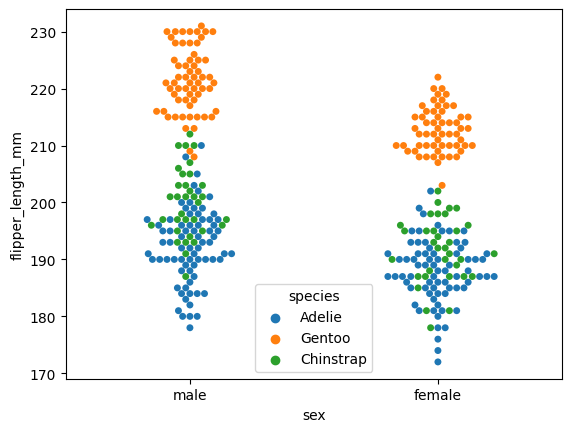

In [14]:
sns.swarmplot(x="sex", y="flipper_length_mm", data=df, hue="species")

<Axes: xlabel='species', ylabel='body_mass_g'>

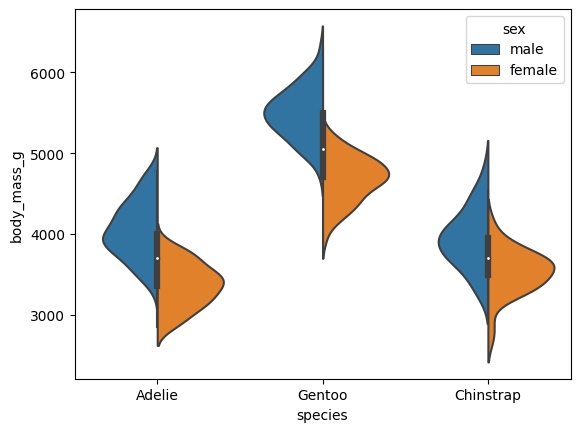

In [15]:
sns.violinplot(x="species", y="body_mass_g", data=df, hue="sex", split=True)

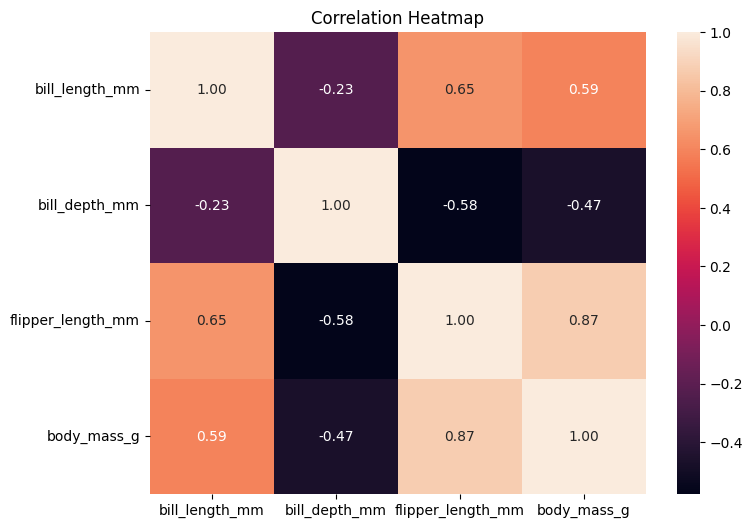

In [16]:
# Visualisasi Heatmap Untuk Melihat Korelasi Antar Fitur
df = pd.DataFrame(df)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

   # <b><font color='black'>Data pre-processing</font></b>
---
Serangkaian langkah atau teknik yang dilakukan untuk mempersiapkan data mentah menjadi data yang siap digunakan dalam analisis data dan pemodelan.

   # <b><font color='black'>Train-Test Split</font></b>
---

- Kenapa?
1. Karena tidak mau overfit data training dan menghindari data leakage
2. Test data akan menjadi future data
3. Kita akan latih model ML di data training
4. Selanjutnya melakukan evaluasi di data testing

In [17]:
# Splitting Data
def extractInputOutput(data,
                       output_column_name):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    # buat output
    output_data = df[output_column_name]
    
    # buat input
    input_data = df.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [18]:
# Jangan sampai salah urutan dalam penempatan return
output_column_name = ["species"]

X, y = extractInputOutput(data = df,
                          output_column_name = output_column_name)

In [19]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male


In [20]:
y.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


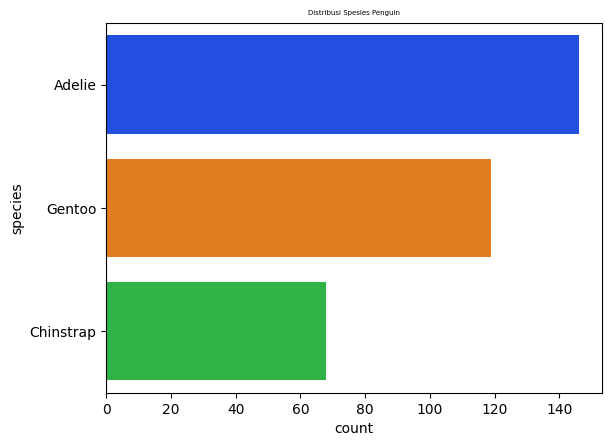

In [23]:
# Melihat distribusi kelas target
def bar_chart(category, title):
    sns.countplot(data = y, y = y[category],order= y[category].value_counts().index, palette='bright')
    plt.title(title, size = 5)
    plt.show()

bar_chart("species","Distribusi Spesies Penguin")

In [24]:
# Encode kelas target
y['species'] = y['species'].map({
    'Adelie': 0,
    'Gentoo': 1,
    'Chinstrap': 2,
})
y.head()

,species
0,0
1,0
2,0
4,0
5,0


In [25]:
# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan hasil split
splits = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Simpan dalam list
    splits.append((X_train, X_test, y_train, y_test))

# Contoh mengakses fold pertama
X_train_fold1, X_test_fold1, y_train_fold1, y_test_fold1 = splits[0]

# Cek shape data fold pertama
print(f"X_train shape: {X_train_fold1.shape}, \ny_train shape: {y_train_fold1.shape}")
print(f"X_test shape: {X_test_fold1.shape}, \ny_test shape: {y_test_fold1.shape}")

X_train shape: (266, 6), 
y_train shape: (266, 1)
X_test shape: (67, 6), 
y_test shape: (67, 1)


In [26]:
# Sanity cek tipe data
X.dtypes

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [27]:
#_get_numeric_data() hanya akan mengambil column berisikan integer dan float
# hati-hati dengan data kategoric yang berbentuk integer!! 
X_train_numerical = X_train_fold1._get_numeric_data() 
X_test_numerical = X_test_fold1._get_numeric_data()
# X_numerical = X._get_numeric_data() 
# X_numerical.head()

In [28]:
# Memisahkan data numerik dan menampilkan data kategorik 
X_train_categorical = X_train_fold1.drop(list(X_train_numerical.columns.values), axis=1)
X_test_categorical = X_test_fold1.drop(list(X_test_numerical.columns.values), axis=1)
# X_categorical = X.drop(list(X_numerical.columns.values), axis=1)
# X_categorical.head()

In [ ]:
# # Inisialisasi imputer dengan modus
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit dan transform ke data kategorikal
# X_train_categorical_imputed = pd.DataFrame(
#     imputer.fit_transform(X_train_categorical),
#     columns=X_train_categorical.columns,
#     index=X_train_categorical.index
# )

# X_test_categorical_imputed = pd.DataFrame(
#     imputer.fit_transform(X_test_categorical),
#     columns=X_test_categorical.columns,
#     index=X_test_categorical.index
# )

# # X_categorical_imputed = pd.DataFrame(
# #     imputer.fit_transform(X_categorical),
# #     columns=X_categorical.columns,
# #     index=X_categorical.index
# # )

# X_train_categorical_imputed.head()

In [ ]:
# print(X_train_categorical.index.equals(y_train_fold1.index))  # harus True
# print(X_train_numeric_scaled_df.index.equals(y_train_fold1.index))  # harus True

In [30]:
def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = data[categorical_column]
    categorical_ohe = pd.get_dummies(data_categorical).astype(int)

    return categorical_ohe

In [32]:
X_train_categorical_ohe = extractCategorical(
    data=X_train_categorical,
    categorical_column=X_train_categorical.columns.tolist()
)

X_test_categorical_ohe = extractCategorical(
    data=X_test_categorical,
    categorical_column=X_test_categorical.columns.tolist()
)

# X_categorical_ohe = extractCategorical(
#     data=X_categorical_imputed,
#     categorical_column=X_categorical_imputed.columns.tolist()
# )


X_train_categorical_ohe.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,0,0,1,0,1
1,0,0,1,1,0
5,0,0,1,0,1
6,0,0,1,1,0
12,0,0,1,1,0


In [ ]:
# # Inisialisasi KNN Imputer (k=5 bisa disesuaikan)
# imputer = KNNImputer(n_neighbors=5)

# # Imputasi nilai NaN
# X_train_numeric = pd.DataFrame(
#     imputer.fit_transform(X_train_numerical),
#     columns=X_train_numerical.columns
# )

# X_test_numeric = pd.DataFrame(
#     imputer.fit_transform(X_test_numerical),
#     columns=X_test_numerical.columns
# )

# # X_numeric = pd.DataFrame(
# #     imputer.fit_transform(X_numerical),
# #     columns=X_numerical.columns
# # )

# X_train_numeric.isna().sum()

In [33]:
# Fungsi Standarisasi Data
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw, columns=data_columns, index=data_index)

    return standardized_data, standardizer

# Ambil hanya kolom numerik dari train dan test dataset
numeric_columns = X_train_numerical.select_dtypes(include='number').columns
X_train_numeric_data = X_train_numerical[numeric_columns]
X_test_numeric_data = X_test_numerical[numeric_columns]
# X_numeric_data = X_numeric[numeric_columns]

# Standarisasi Data
X_train_numeric_scaled_df, scaler = standardizerData(X_train_numeric_data)
X_test_numeric_scaled_df, _ = standardizerData(X_test_numeric_data)
# X_numeric_scaled_df, _ = standardizerData(X_numeric_data)

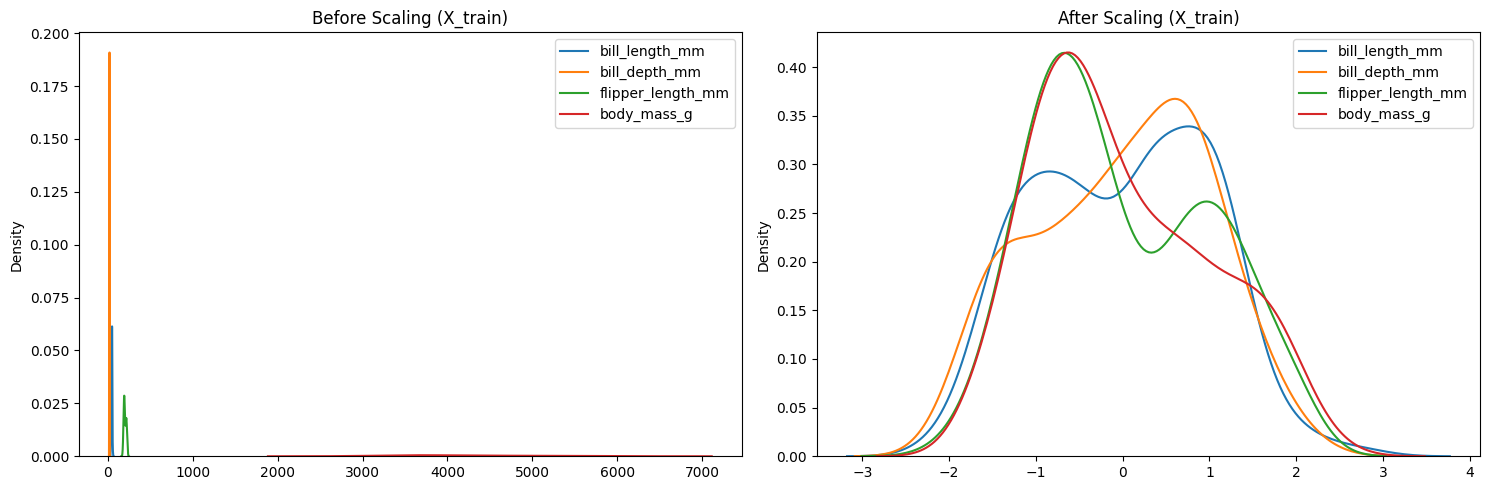

In [34]:
# Visualisasi distribusi sebelum dan sesudah scaling X_train
plt.figure(figsize=(15, 5))

# Plot Before Scaling (X_train)
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(X_train_numeric_data[column], hist=False, label=column)
plt.title('Before Scaling (X_train)')
plt.xlabel('')
plt.legend()

# Plot After Scaling (X_train)
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(X_train_numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling (X_train)')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

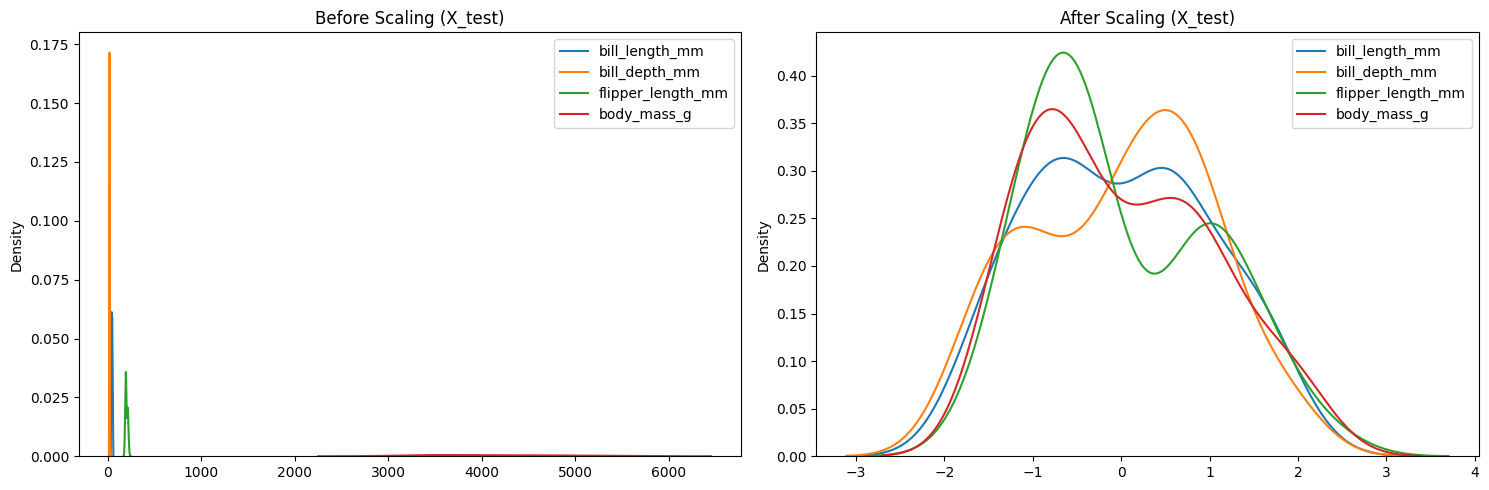

In [35]:
# Visualisasi distribusi sebelum dan sesudah scaling X_test
plt.figure(figsize=(15, 5))

# Plot Before Scaling (X_test)
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(X_test_numeric_data[column], hist=False, label=column)
plt.title('Before Scaling (X_test)')
plt.xlabel('')
plt.legend()

# Plot After Scaling (X_test)
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(X_test_numeric_scaled_df[column], hist=False, label=column)
plt.title('After Scaling (X_test)')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # Visualisasi distribusi sebelum dan sesudah scaling X
# plt.figure(figsize=(15, 5))

# # Plot Before Scaling (X)
# plt.subplot(121)
# for column in numeric_columns:
#     sns.distplot(X_numeric_data[column], hist=False, label=column)
# plt.title('Before Scaling (X_test)')
# plt.xlabel('')
# plt.legend()

# # Plot After Scaling (X)
# plt.subplot(122)
# for column in numeric_columns:
#     sns.distplot(X_numeric_scaled_df[column], hist=False, label=column)
# plt.title('After Scaling (X_test)')
# plt.xlabel('')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [45]:
X_train_concat = pd.concat(
    [X_train_numeric_scaled_df, X_train_categorical_ohe],
    axis=1
)

X_test_concat = pd.concat(
    [X_test_numeric_scaled_df, X_test_categorical_ohe],
    axis=1
)

In [37]:
X_train_concat.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,-0.924281,0.805997,-1.403734,-0.581112,0,0,1,0,1
1,-0.851858,0.130655,-1.058127,-0.520742,0,0,1,1,0
5,-0.888069,1.793036,-0.781642,-0.701850,0,0,1,0,1
6,-0.960493,0.338452,-1.403734,-0.732035,0,0,1,1,0
12,-0.562165,0.234554,-1.334612,-1.245175,0,0,1,1,0


In [46]:
print(f"X_train_concat shape: {X_test_concat.shape}")
print(f"y shape: {y_test_fold1.shape}")

# Output: data menjadi seimbang

X_train_concat shape: (67, 9)
y shape: (67, 1)


In [ ]:
# SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

  # <b><font color='black'>Training Machine Learning</font></b>
---
* Choose Best Score Model
* Kita harus mengalahkan benchmark/baseline

  # <b><font color='black'>Benchmark / Baseline</font></b>
---
- Baseline untuk evaluasi nanti
- Karena ini adalah kasus klasifikasi, baseline bisa diambil dari proporsi kelas target (spesies penguin) yang paling dominan.
- Dengan kata lain, kita bisa membuat tebakan sederhana bahwa semua penguin termasuk dalam spesies yang paling banyak muncul (misalnya, Adelie) tanpa menggunakan pemodelan apa pun.

In [41]:
y_train_fold1.value_counts(normalize = True)

# baseline akurasi = 43%

species
0          0.436090
1          0.360902
2          0.203008
Name: proportion, dtype: float64

  # <b><font color='black'>Machine Learning Klasik</font></b>
---
Beberapa model yang kami gunakan: (apa aja sebutin)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 9
[LightGBM] [Info] Start training from score -0.829906
[LightGBM] [Info] Start training from score -1.019148
[LightGBM] [Info] Start training from score -1.594512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

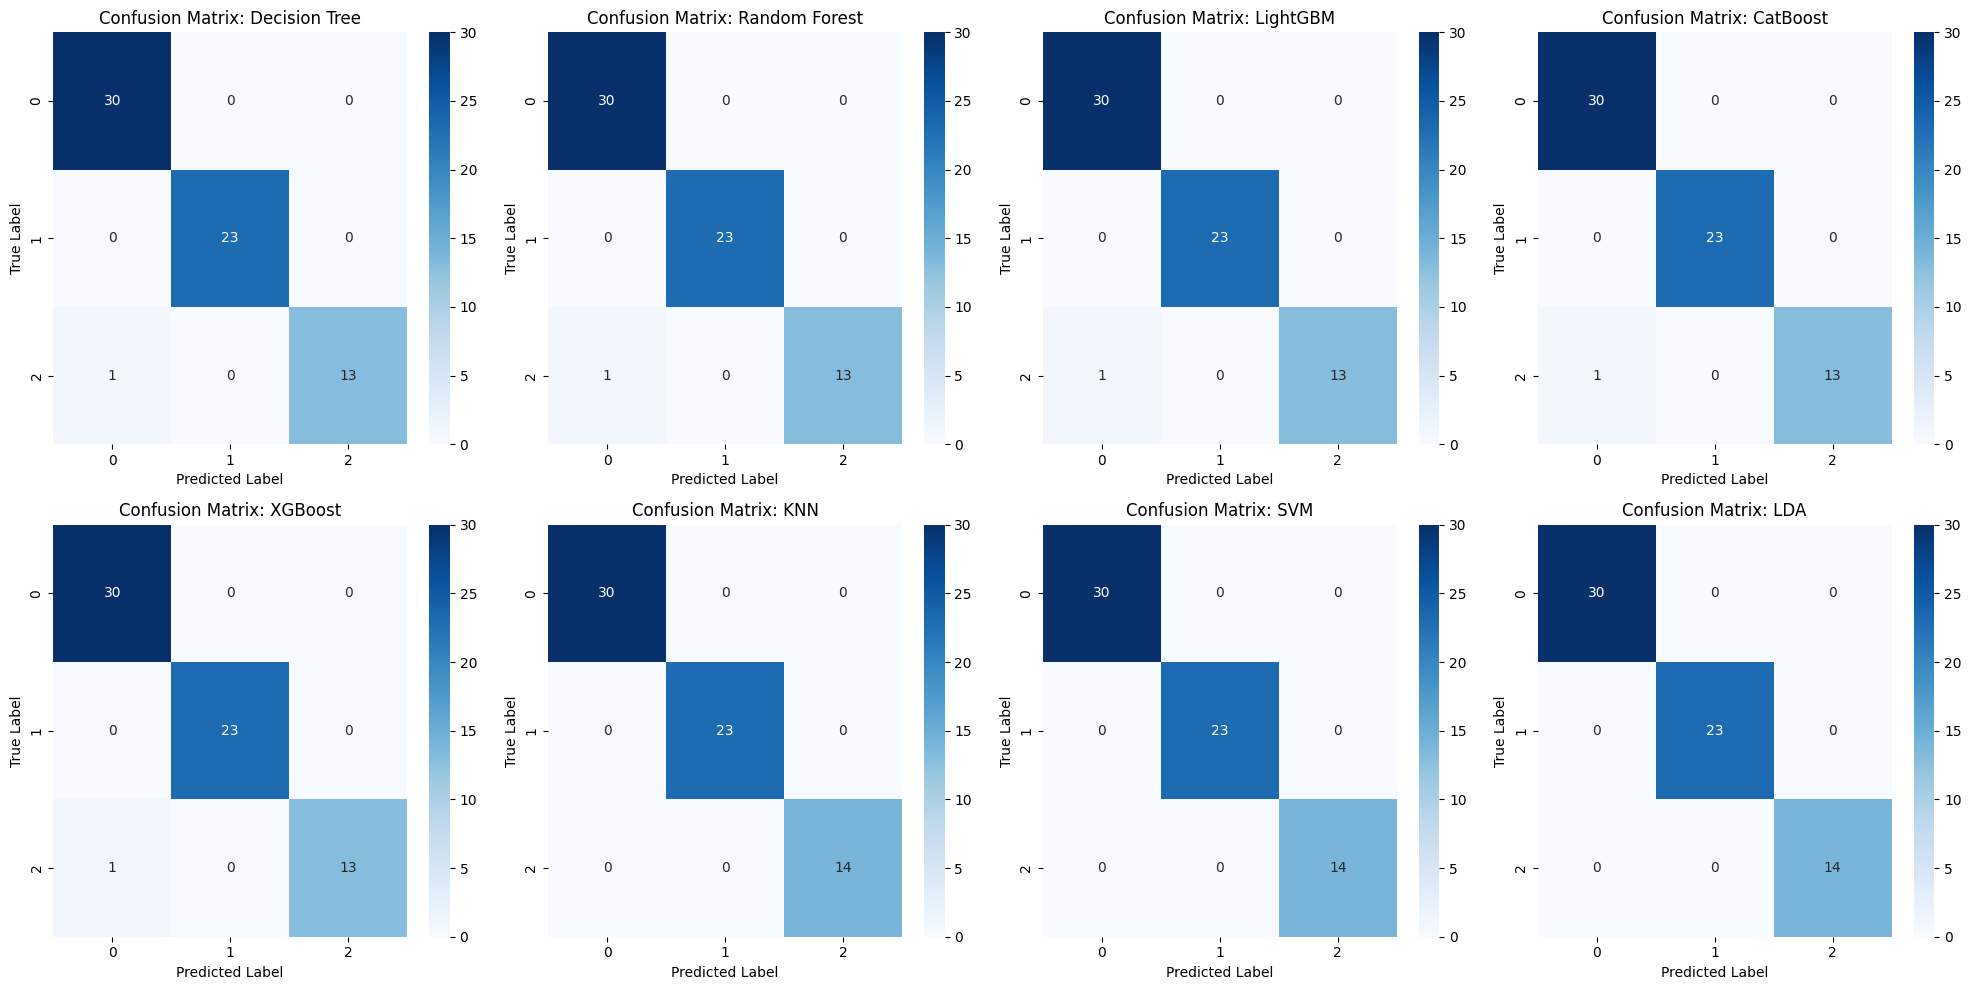

In [49]:
# Model yang digunakan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "LDA": LinearDiscriminantAnalysis()
}

# List untuk menyimpan confusion matrix hasil
conf_matrices = {}

# Train dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train_concat, y_train_fold1)
    y_pred = model.predict(X_test_concat)
    conf_matrices[name] = confusion_matrix(y_test_fold1, y_pred)

# Menampilkan confusion matrix dalam bentuk tabel
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

  # <b><font color='black'>Evaluation</font></b>
---
Evaluation digunakan untuk mengukur kinerja model pada dataset uji (test set).

In [50]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Train dan evaluasi setiap model
for name, model in models.items():
    model.fit(X_train_concat, y_train_fold1)
    y_pred = model.predict(X_test_concat)
    
    # Menghitung metrik evaluasi
    acc = accuracy_score(y_test_fold1, y_pred)
    precision = precision_score(y_test_fold1, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test_fold1, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test_fold1, y_pred, average='weighted', zero_division=1)
    
    # Simpan hasil ke dalam dictionary
    evaluation_results["Model"].append(name)
    evaluation_results["Accuracy"].append(acc)
    evaluation_results["Precision"].append(precision)
    evaluation_results["Recall"].append(recall)
    evaluation_results["F1-Score"].append(f1)

# Konversi dictionary menjadi DataFrame
results_df = pd.DataFrame(evaluation_results)

# Menampilkan tabel hasil evaluasi
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 266, number of used features: 9
[LightGBM] [Info] Start training from score -0.829906
[LightGBM] [Info] Start training from score -1.019148
[LightGBM] [Info] Start training from score -1.594512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

  # <b><font color='black'>Simpan Model</font></b>
---
Untuk memastikan reproduktifitas, kami menyimpan model ke dalam file .pkl dengan menggunakan library pickle dari Python.